# Metody obliczeniowe w nauce i technice#

## Vadim Karpinskiy

### Laboratorium 6: Równania nieliniowe

#### Zadanie 1: Metoda bisekcji

In [2]:
from mpmath import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f1(x):
    return cos(x)*cosh(x) - 1

def f2(x):
    return (1/x) - tan(x)

def f3(x):
    return 2**(-x) + e**x + 2 * cos(x) - 6

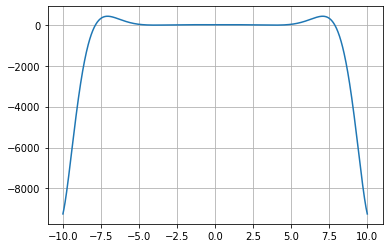

In [4]:
xs = np.linspace(-10, 10, 1000)
plt.plot(xs, (np.cos(xs) * np.cosh(xs) - 1))
plt.grid()
plt.show()

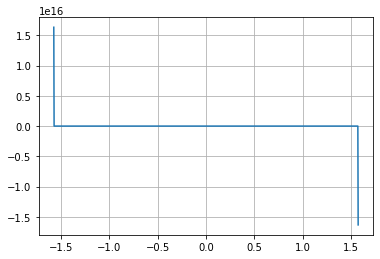

In [5]:
xs = np.linspace(-np.pi/2.0, np.pi/2.0, 1000)
plt.plot(xs, ((1/xs) - np.tan(xs)))
plt.grid()
plt.show()

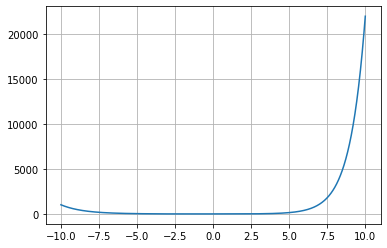

In [6]:
xs = np.linspace(-10, 10, 1000)
plt.plot(xs, (2**(-xs) + e**xs + 2 * np.cos(xs) - 6))
plt.grid()
plt.show()

In [7]:
def iterations_bound(a,b,epsilon):
    return int(ceil(log((b-a) / epsilon) / log(2)))

In [8]:
def bisection(f, epsilon, a,b, precision):
    mp.dps = precision
    u = f(a)
    v = f(b)
    M = iterations_bound(a,b,epsilon)
    e = b - a
    if np.sign(u) == np.sign(v):
        print("Funkcja nie ma miejsc zerowych lub ma ich więcej niż 1")
        return None
    for i in range(M):
        e /= 2.0
        c = a + e
        w = f(c)
        if abs(w) < epsilon:
            break
        if np.sign(w) != np.sign(u):
            b = c
            v = w
        else:
            a = c
            u = w
    return c, f(c), i

In [9]:
print(bisection(f1, mpf(1e-7), 3/2*pi, 2*pi, 7), end='\n')
print("-----------------")
print(bisection(f1, mpf(1e-15), 3/2*pi, 2*pi, 15), end='\n')
print("-----------------")
print(bisection(f1, mpf(1e-33), 3/2*pi, 2*pi, 33))

(mpf('4.730040729'), mpf('-9.164214134e-7'), 23)
-----------------
(mpf('4.7300407448627046'), mpf('3.5749181392930041e-14'), 50)
-----------------
(mpf('4.73004074486270402602404810083388552'), mpf('4.00593428432545057435643412057664882e-32'), 110)


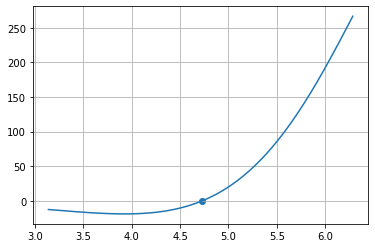

In [10]:
xs = np.linspace(np.pi, 2 * np.pi, 1000)
plt.plot(xs, (np.cos(xs) * np.cosh(xs) - 1))
plt.scatter(4.73, 0)
plt.grid()
plt.show()

In [11]:
print(bisection(f2, mpf(1e-7), mpf(1e-7), pi/2, 7), end='\n')
print("-----------------")
print(bisection(f2, mpf(1e-15), mpf(1e-15), pi/2, 15), end='\n')
print("-----------------")
print(bisection(f2, mpf(1e-33), mpf(1e-33), pi/2, 33))

(mpf('0.8603335992'), mpf('-2.980232239e-8'), 23)
-----------------
(mpf('0.86033358901937995'), mpf('-6.6613381477509392e-16'), 50)
-----------------
(mpf('0.860333589019379762483893424137662091'), mpf('9.62964972193617926527988971292463659e-34'), 110)


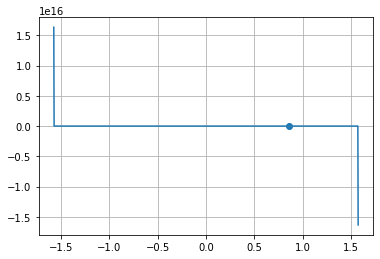

In [12]:
xs = np.linspace(-np.pi/2, np.pi/2, 1000)
plt.plot(xs, ((1/xs) - np.tan(xs) - 1))
plt.scatter(0.86, 0)
plt.grid()
plt.show()

In [13]:
print(bisection(f3, mpf(1e-7), 1, 3, 7), end='\n')
print("-----------------")
print(bisection(f3, mpf(1e-15), 1, 3, 15), end='\n')
print("-----------------")
print(bisection(f3, mpf(1e-33), 1, 3, 33))

(1.8293836116790771, mpf('5.960464478e-8'), 22)
-----------------
(1.8293836019338494, mpf('1.7763568394002505e-15'), 50)
-----------------
(1.8293836019338487, mpf('-3.085210055428222463650379106700904e-16'), 110)


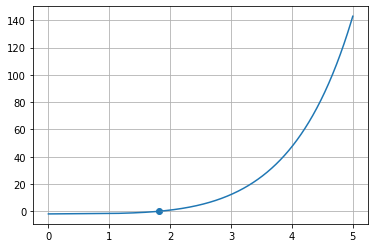

In [14]:
xs = np.linspace(0, 5, 1000)
plt.plot(xs, (2**(-xs) + e**xs + 2 * np.cos(xs) - 6))
plt.scatter(1.82, 0)
plt.grid()
plt.show()

W jaki sposób możemy obliczyć k pierwszych dodatnich pierwiastków funkcji f1(x)?

Możemy sprawdzać pierwiastki w przedziale o długości 1. W takim przedziale ta funkcja nigdy nie ma dwóch miejsc zerowych.

In [15]:
def first_k_positive_roots(f, precision, epsilon, k):
    roots = []
    left = 0.1
    while len(roots) < k:
        root = bisection(f,epsilon, left, left + 1, precision)
        left += 1
        if root is not None:
            roots.append(root[0])
    return roots

roots = first_k_positive_roots(f1, 10, mpf(1e-10), 6)
print(roots)

Funkcja nie ma miejsc zerowych lub ma ich więcej niż 1
Funkcja nie ma miejsc zerowych lub ma ich więcej niż 1
Funkcja nie ma miejsc zerowych lub ma ich więcej niż 1
Funkcja nie ma miejsc zerowych lub ma ich więcej niż 1
Funkcja nie ma miejsc zerowych lub ma ich więcej niż 1
Funkcja nie ma miejsc zerowych lub ma ich więcej niż 1
Funkcja nie ma miejsc zerowych lub ma ich więcej niż 1
Funkcja nie ma miejsc zerowych lub ma ich więcej niż 1
Funkcja nie ma miejsc zerowych lub ma ich więcej niż 1
Funkcja nie ma miejsc zerowych lub ma ich więcej niż 1
Funkcja nie ma miejsc zerowych lub ma ich więcej niż 1
Funkcja nie ma miejsc zerowych lub ma ich więcej niż 1
Funkcja nie ma miejsc zerowych lub ma ich więcej niż 1
Funkcja nie ma miejsc zerowych lub ma ich więcej niż 1
Funkcja nie ma miejsc zerowych lub ma ich więcej niż 1
[4.730040744843427, 7.853204624110367, 10.995607837999705, 14.137165491201449, 17.278759657370394, 20.420352245646065]


#### Zadanie 2: Metoda Newtona

Policzyłem pochodne zadanych funkcji osobno:

In [16]:
def df1(x):
    return (cos(x)*sinh(x) - sin(x)*cosh(x))

def df2(x):
    return (-1)/(cos(x)**2) - 1/(x**2)

def df3(x):
    return e**x - 2*sin(x) - 2**(-x)*ln(2) 

In [17]:
def newton(f, df, epsilon, a, b, precision):
    M = iterations_bound(a,b,epsilon)
    mp.dps = precision
    x = a
    for i in range(M):
        fx = f(x)
        if abs(fx) < epsilon:
            return x, fx, i
        
        dfx = df(x)
        if dfx == 0: 
            print("Dzielenie przez 0")
            return None
        
        x = x - fx/dfx
    # jeśli wyszliśmy poza pętlę - oznacza to, że próg iteracji jest
    # przekroczony
    print("Przekroczona maksymalna liczba iteracji")
    return None

In [18]:
print(newton(f1, df1, mpf(1e-7), 3/2*pi, 2*pi, 8), end='\n')
print("-----------------")
print(newton(f1, df1, mpf(1e-15), 3/2*pi, 2*pi, 17), end='\n')
print("-----------------")
print(newton(f1, df1, mpf(1e-33), 3/2*pi, 2*pi, 35))

(mpf('4.7300407439'), mpf('-5.2154064178e-8'), 3)
-----------------
(mpf('4.7300407448627040247'), mpf('-7.7195194680967915701e-17'), 4)
-----------------
(mpf('4.7300407448627040260240481008338848171'), mpf('-1.6174802267314676109649814752178100527e-34'), 5)


In [19]:
print(newton(f2, df2, mpf(1e-7), mpf(1e-1) , pi/2, 8), end='\n')
print("-----------------")
print(newton(f2, df2, mpf(1e-15), mpf(1e-1) , pi/2, 17), end='\n')
print("-----------------")
print(newton(f2, df2, mpf(1e-15), mpf(1e-1) , pi/2, 35))

(mpf('0.86033358984'), mpf('-3.7252902985e-9'), 6)
-----------------
(mpf('0.86033358901937976269'), mpf('0.0'), 7)
-----------------
(mpf('0.86033358901937976253917906878504473239'), mpf('-2.0467120340044214139852607658119217451e-19'), 7)


In [20]:
print(newton(f3, df3, mpf(1e-7), 1 , 3, 8), end='\n')
print("-----------------")
print(newton(f2, df2, mpf(1e-15), 1 , 3, 17), end='\n')
print("-----------------")
print(newton(f2, df2, mpf(1e-15), 1 , 3, 35))

(mpf('1.8293836042'), mpf('7.4505805969e-9'), 7)
-----------------
(mpf('0.86033358901937976269'), mpf('0.0'), 4)
-----------------
(mpf('0.86033358901937976309262142719454098149'), mpf('-2.2535523231001752586315515369425239514e-18'), 4)


#### Zadanie 3: Metoda siecznych

In [21]:
def secant(f, epsilon, a, b, precision):
    M = iterations_bound(a,b,epsilon)
    mp.dps = precision
    
    fa = f(a)
    fb = f(b)
    
    for i in range(M+1):
        
        if abs(fa) <= epsilon:
            return b, fb, i
        
        if fb - fa == 0: 
            return None
            
        restart = (a * fb - b * fa) /(fb - fa)
        
        a,  b  = b,  restart
        fa, fb = fb, f(restart)
        
    return None

In [22]:
print(secant(f1, mpf(1e-7), 3/2*pi, 2*pi, 8), end='\n')
print("-----------------")
print(secant(f1, mpf(1e-15), 3/2*pi, 2*pi, 17), end='\n')
print("-----------------")
print(secant(f1, mpf(1e-33), 3/2*pi, 2*pi, 35), end='\n')

(mpf('4.7300407439'), mpf('-5.2154064178e-8'), 6)
-----------------
(mpf('4.7300407448627040247'), mpf('-7.7195194680967915701e-17'), 8)
-----------------
(mpf('4.7300407448627040260240481008338848171'), mpf('-1.6174802267314676109649814752178100527e-34'), 9)


In [43]:
print(secant(f2, mpf(1e-7), mpf(1e-7) , pi/8, 12), end='\n')
print("-----------------")
print(secant(f2, mpf(1e-15), mpf(1e-15), pi/2, 17), end='\n')
print("-----------------")
print(secant(f2, mpf(1e-33), mpf(1e-33), pi/2, 35), end='\n')

(mpf('0.860333589019547'), mpf('-4.54747350886464e-13'), 7)
-----------------
(mpf('0.86033358901937976356'), mpf('-3.4694469519536141888e-18'), 16)
-----------------
(mpf('0.86033358901937976248389342413766233358'), mpf('-1.5046327690525280101999827676444744676e-36'), 79)


In [37]:
print(secant(f3, mpf(1e-7), 1 , 3, 8), end='\n')
print("-----------------")
print(secant(f3, mpf(1e-15), 1, 3, 17), end='\n')
print("-----------------")
print(secant(f3, mpf(1e-33), 1, 3, 35), end='\n')

(mpf('1.8293836024'), mpf('0.0'), 10)
-----------------
(mpf('1.8293836019338488175'), mpf('6.9388939039072283776e-18'), 11)
-----------------
(mpf('1.8293836019338488171362129468141507913'), mpf('0.0'), 13)


##### Porównanie funkcji:

Mała precyzja (7 znaków):

In [47]:
print("Porównanie wyników metod dla pierwszej funkcji: ", end= "\n")
print("Metoda bisekcji: \t", bisection(f1, mpf(1e-7), 3/2*pi, 2*pi, 7)[0])
print("-----------------")
print("Metoda Newtona: \t", newton(f1, df1, mpf(1e-7), 3/2*pi, 2*pi, 8)[0])
print("-----------------")
print("Metoda siecznych: \t", secant(f1, mpf(1e-7), 3/2*pi, 2*pi, 8)[0])


Porównanie wyników metod dla pierwszej funkcji: 
Metoda bisekcji: 	 4.730041
-----------------
Metoda Newtona: 	 4.7300407
-----------------
Metoda siecznych: 	 4.7300407


Średnia precyzja (15 znaków):

In [49]:
print("Porównanie wyników metod dla drugiej funkcji: ", end= "\n")
print("Metoda bisekcji: \t", bisection(f2, mpf(1e-15), mpf(1e-15), pi/2, 15)[0])
print("-----------------")
print("Metoda Newtona: \t", newton(f2, df2, mpf(1e-15), mpf(1e-1), pi/2, 17)[0])
print("-----------------")
print("Metoda siecznych: \t", secant(f2, mpf(1e-15), mpf(1e-15), pi/2, 17)[0])

Porównanie wyników metod dla drugiej funkcji: 
Metoda bisekcji: 	 0.86033358901938
-----------------
Metoda Newtona: 	 0.86033358901937976
-----------------
Metoda siecznych: 	 0.86033358901937976


Super precyzja:

In [ ]:
print("Porównanie wyników metod dla trzeciej funkcji: ", end= "\n")
print("Metoda bisekcji: \t", bisection(f2, , mpf(1e-15), pi/2, 15)[0])
print("-----------------")
print("Metoda Newtona: \t", newton(f2, df2, mpf(1e-15), mpf(1e-1), pi/2, 17)[0])
print("-----------------")
print("Metoda siecznych: \t", secant(f2, mpf(1e-15), mpf(1e-15), pi/2, 17)[0])

### Podsumowanie:

Metoda bisekcji jest najwolniejsza. W przypadku kilku miejsc zerowych na danym przedziale ta metoda albo w ogóle ich nie znajdzie, albo znajdzie tylko 1.

Metody Newtona i siecznych są szybsze, jednak mogą trafić na "złośliwą" funkcję i nie znaleźć rozwiązania. W praktyce lepiej stowa